In [1]:
import cv2
import random
import numpy as np
from matplotlib import pyplot as plt

In [5]:
img = cv2.imread('/Users/cwj/Desktop/cv-homework/sherry.png')
cv2.imshow("sherry",img)      # 显示图片
cv2.waitKey(0)  # 按任意键关闭显示图片
cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)

-1

In [6]:
img.shape

(892, 886, 3)

In [7]:
B, G, R = cv2.split(img)
cv2.imshow('B', B)
cv2.imshow('G', G)
cv2.imshow('R', R)
cv2.waitKey(0)  # 按任意键关闭显示图片
cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)
#可以看出B灰度图很暗，说明B取值相对RG偏小。事实上，图像以黄色为主，黄色又红绿亮色组成

-1

In [15]:
# change color 随机改变三个通道数值再重组
def random_light_color(img):
    # brightness
    B, G, R = cv2.split(img)
    color=[B,G,R]
    for j in range(0,3):
        i = color[j]
        rand = random.randint(-50, 50)
        i = i + rand
        i[i > 255] = 255
        i[i < 0] = 0
        color[j] = i
    img_merge = cv2.merge(color)
    #img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img_merge 
img_random_color = random_light_color(img)
cv2.imshow('img_random_color', img_random_color)
cv2.waitKey(0)  # 按任意键关闭显示图片
cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)

In [17]:
# gamma correction 改变明暗（对比度？）
def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0/gamma
    table = []
    for i in range(256):
        table.append(((i / 255.0) ** invGamma) * 255)
    table = np.array(table).astype("uint8")
    return cv2.LUT(img, table)
img_brighter = adjust_gamma(img, 2)
cv2.imshow('img_dark', img)
cv2.imshow('img_brighter', img_brighter)
cv2.waitKey(0)  # 按任意键关闭显示图片
cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)


-1

-1

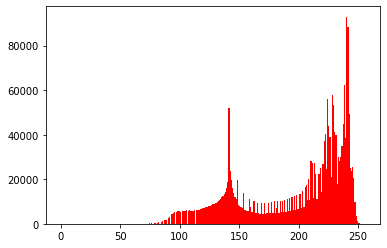

In [19]:
# histogram
img_small_brighter = cv2.resize(img_brighter, (int(img_brighter.shape[0]*0.5), int(img_brighter.shape[1]*0.5)))
plt.hist(img_brighter.flatten(), 256, [0, 256], color = 'r')
img_yuv = cv2.cvtColor(img_small_brighter, cv2.COLOR_BGR2YUV)
# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])   # only for 1 channel
# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)  
cv2.imshow('Color input image', img_small_brighter)
cv2.imshow('Histogram equalized', img_output)
cv2.waitKey(0)  # 按任意键关闭显示图片
cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)

In [20]:
# rotation
M = cv2.getRotationMatrix2D((img.shape[1] / 2, img.shape[0] / 2), 30, 1) # center, angle, scale
img_rotate = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
cv2.imshow('sherry_rotated', img_rotate)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

print(M)

# set M[0][2] = M[1][2] = 0
print(M)
img_rotate2 = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
cv2.imshow('sherry_rotated2', img_rotate2)
cv2.waitKey(0)  # 按任意键关闭显示图片
cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)

[[   0.8660254     0.5        -163.64925388]
 [  -0.5           0.8660254   281.25266991]]
[[   0.8660254     0.5        -163.64925388]
 [  -0.5           0.8660254   281.25266991]]


-1

In [22]:
# explain translation

# scale+rotation+translation = similarity transform
M = cv2.getRotationMatrix2D((img.shape[1] / 2, img.shape[0] / 2), 30, 0.5) # center, angle, scale
img_rotate = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
cv2.imshow('sherry_rotated', img_rotate)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

print(M)
cv2.waitKey(0)  # 按任意键关闭显示图片
cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)

[[ 4.33012702e-01  2.50000000e-01  1.39675373e+02]
 [-2.50000000e-01  4.33012702e-01  3.63626335e+02]]


-1

In [24]:
##############################
# Affine Transform
rows, cols, ch = img.shape
pts1 = np.float32([[0, 0], [cols - 1, 0], [0, rows - 1]])
pts2 = np.float32([[cols * 0.2, rows * 0.1], [cols * 0.9, rows * 0.2], [cols * 0.1, rows * 0.9]])
 
M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, M, (cols, rows))

cv2.imshow('sherry_affine', dst)
cv2.waitKey(0)  # 按任意键关闭显示图片
cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)

############################

-1

In [25]:
# perspective transform
def random_warp(img, row, col):
    height, width, channels = img.shape

    # warp:
    random_margin = 60
    x1 = random.randint(-random_margin, random_margin)
    y1 = random.randint(-random_margin, random_margin)
    x2 = random.randint(width - random_margin - 1, width - 1)
    y2 = random.randint(-random_margin, random_margin)
    x3 = random.randint(width - random_margin - 1, width - 1)
    y3 = random.randint(height - random_margin - 1, height - 1)
    x4 = random.randint(-random_margin, random_margin)
    y4 = random.randint(height - random_margin - 1, height - 1)

    dx1 = random.randint(-random_margin, random_margin)
    dy1 = random.randint(-random_margin, random_margin)
    dx2 = random.randint(width - random_margin - 1, width - 1)
    dy2 = random.randint(-random_margin, random_margin)
    dx3 = random.randint(width - random_margin - 1, width - 1)
    dy3 = random.randint(height - random_margin - 1, height - 1)
    dx4 = random.randint(-random_margin, random_margin)
    dy4 = random.randint(height - random_margin - 1, height - 1)

    pts1 = np.float32([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
    pts2 = np.float32([[dx1, dy1], [dx2, dy2], [dx3, dy3], [dx4, dy4]])
    M_warp = cv2.getPerspectiveTransform(pts1, pts2)
    img_warp = cv2.warpPerspective(img, M_warp, (width, height))
    return M_warp, img_warp
M_warp, img_warp = random_warp(img, img.shape[0], img.shape[1])
cv2.imshow('sherry_warp', img_warp)
cv2.waitKey(0)  # 按任意键关闭显示图片
cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)

-1